In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:

data = pd.read_csv("exam_1_classification_option2.csv")

In [3]:
"""Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [4]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='y')
y= data['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [5]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
y_test_pred = dtree.predict(X_test)
y_train_pred = dtree.predict(X_train)

In [6]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))
print(confusion_matrix(y_train, y_train_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

[[1108  171]
 [ 151 1070]]
[[3724    0]
 [   0 3776]]
0.8712
1.0


## Reason why test data performance is poor:
- 1. Model Overfitting
    - As we can see, the accuracy for training data is 1.0 which means overfitting. When the model memorizes the noise and fits too closely to the training set, the model becomes “overfitted,” and it is unable to generalize well to new data. If a model cannot generalize well to new data, then it will not be able to perform the classification or prediction tasks that it was intended for.
- 2. Unrepresentative Data Sample:
    - An unrepresentative sample is one that does not reflect the distribution of characteristics of the target group, cannot be generalised to the target population, and is therefore biased. There are a number of different sampling methods.
- This issue can be seen by the variance in model skill scores from cross-validation, much like having an unrepresentative data sample.
- The difference here is that the variance can be cleared up by repeating the model evaluation process, e.g. cross-validation, in order to control for the randomness in training the model.
- A large variance on cross-validation scores.
- A large variance on similar model types on the test dataset.

In [8]:
max_depth = []
test_acc = []
train_acc = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(random_state=0, max_depth=i)
    dtree.fit(X_train, y_train)
    test_pred = dtree.predict(X_test)
    train_pred = dtree.predict(X_train)
    test_acc.append(accuracy_score(y_test, test_pred))
    train_acc.append(accuracy_score(y_train, train_pred))
    max_depth.append(i)

In [9]:
d = pd.DataFrame({"test_acc":pd.Series(test_acc), 
    "train_acc":pd.Series(train_acc),
 "max_depth":pd.Series(max_depth)})

In [10]:
d[d["test_acc"] == d["test_acc"].max()]

,test_acc,train_acc,max_depth
12,0.8816,0.982133,13


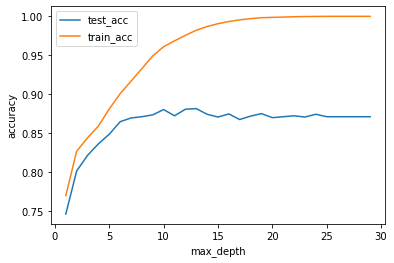

In [11]:
plt.plot("max_depth","test_acc", data=d)
plt.plot("max_depth","train_acc", data=d)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()

In [12]:
data = pd.read_csv("exam_1_classification_option2.csv")

In [13]:
X = data.drop(columns='y')
y= data['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0, max_depth=13)

In [15]:
dtc.fit(X_train, y_train)
test_pred = dtc.predict(X_test)
train_pred = dtc.predict(X_train)
print(accuracy_score(y_test, test_pred))
print(accuracy_score(y_train, train_pred))

0.8816
0.9821333333333333
